# A/B testing


In this notebook we'll go over the process of analysing an A/B test, from formulating a hypothesis, testing it, and finally interpreting results. For our data, we'll use a dataset from Kaggle which contains the results of an A/B test on what seems to be 2 different designs of a website page (old_page vs. new_page). Here's what we'll do:

Designing our experiment
Collecting and preparing the data
Visualising the results
Testing the hypothesis
Drawing conclusions

# Designing our experiment 

You've been tasked with analyzing data from an experiment comparing the old and new landing pages. Your goal is to:

Determine if users spend more time on the new landing page compared to the old one.
Assess whether the conversion rate (users visiting the landing page and getting converted) is higher for the new page.
Investigate whether the conversion status is influenced by the preferred language of users.
Examine whether the time spent on the new page varies among users of different languages.

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

# Collecting and preparing the data

In [2]:
# read the data
data = pd.read_csv('abtest.csv')
df=data.copy()

In [3]:
df.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [7]:
pd.DataFrame({'Count': df.isnull().sum()})

,Count
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [8]:
duplicates=df.duplicated().sum()
duplicates

0

In [9]:
df['user_id'].nunique()

100

# Visualising the results

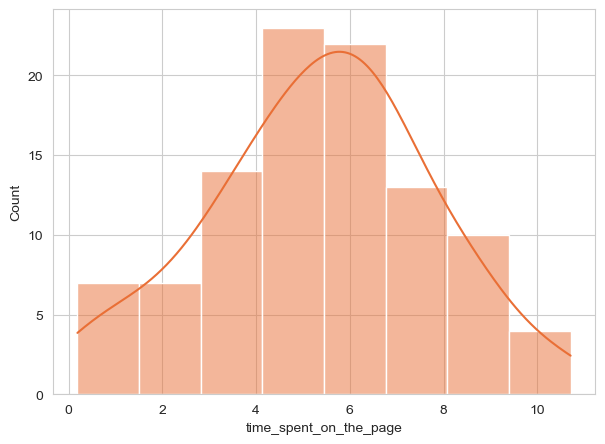

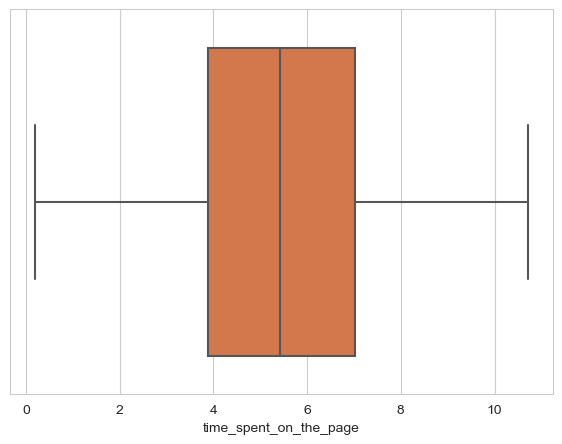

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))          
sns.set_palette("icefire_r")
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()
plt.figure(figsize = (7,5)) 
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

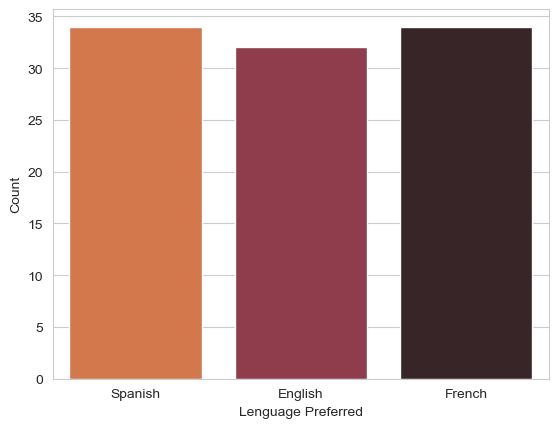

In [11]:
sns.color_palette("icefire_r")
sns.countplot(data=df, x='language_preferred')
plt.xlabel('Lenguage Preferred')
plt.ylabel('Count');


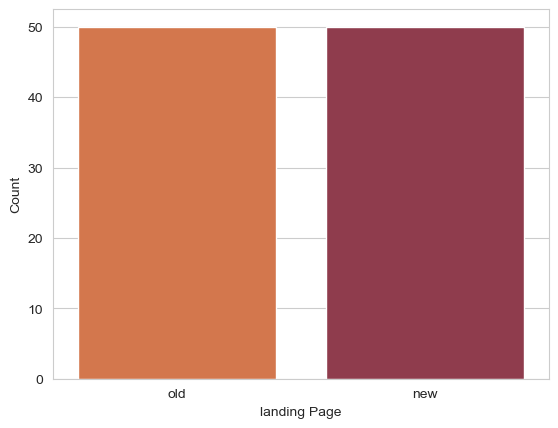

In [12]:
sns.color_palette("icefire_r")
sns.countplot(data=df, x='landing_page')
plt.xlabel('landing Page')
plt.ylabel('Count');

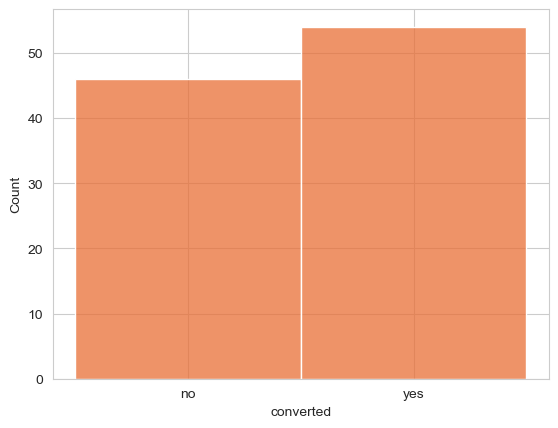

In [13]:
sns.color_palette("icefire_r")
df['converted'].value_counts()
sns.histplot(data=df, x='converted');

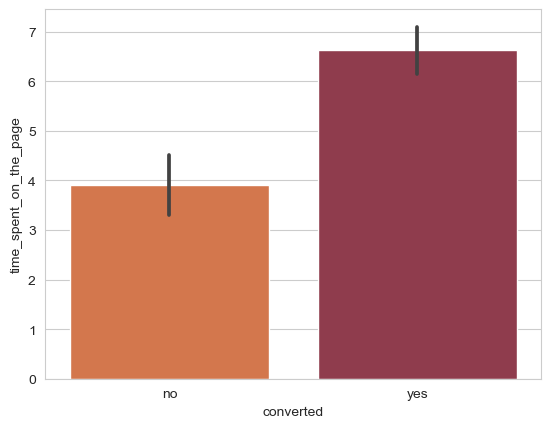

In [14]:
sns.color_palette("icefire_r")
sns.barplot(data=df, x='converted',y='time_spent_on_the_page');
plt.show()

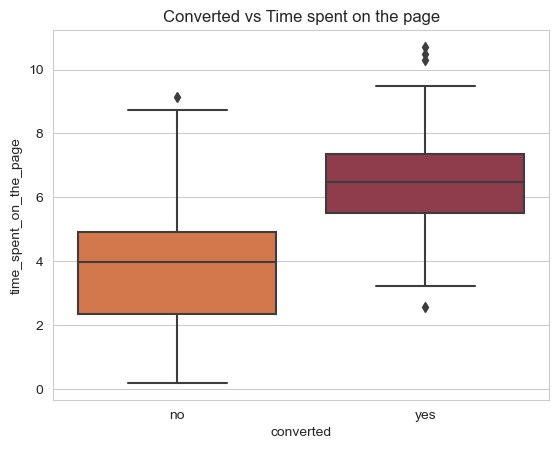

In [15]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='converted',y='time_spent_on_the_page')
plt.title('Converted vs Time spent on the page')
plt.show()

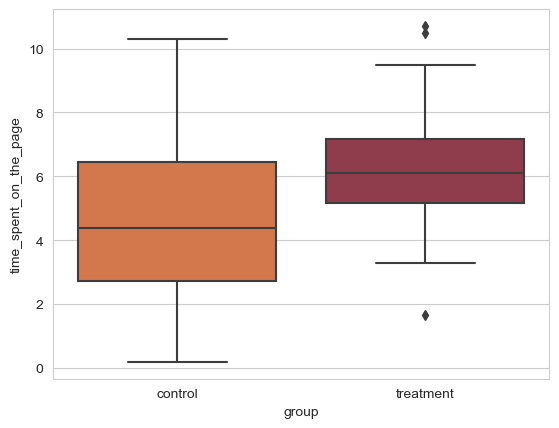

In [16]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='group',y='time_spent_on_the_page');

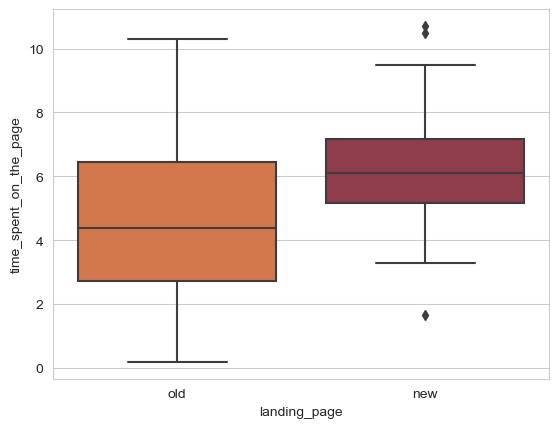

In [17]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page');

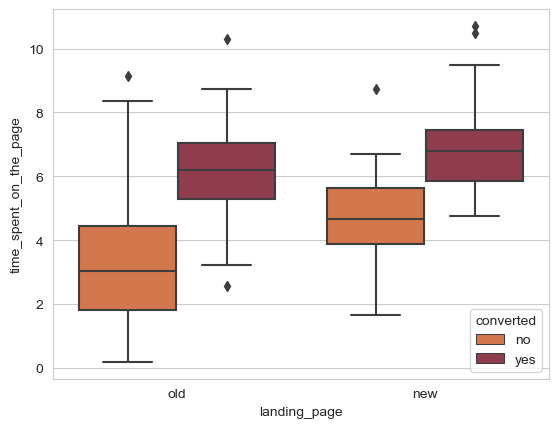

In [18]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page',hue='converted');

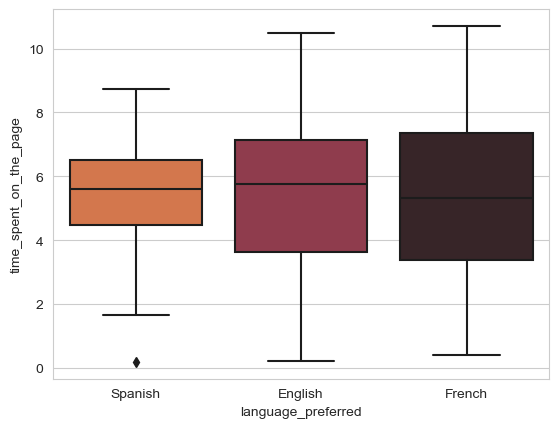

In [19]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='language_preferred',y='time_spent_on_the_page');

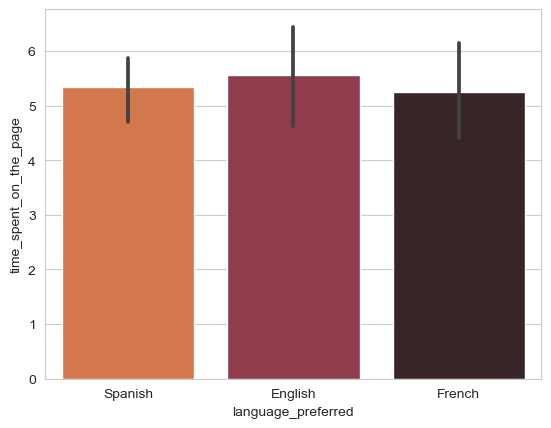

In [20]:
sns.color_palette("icefire_r")
sns.barplot(data=df, x='language_preferred',y='time_spent_on_the_page');

<Figure size 500x300 with 0 Axes>

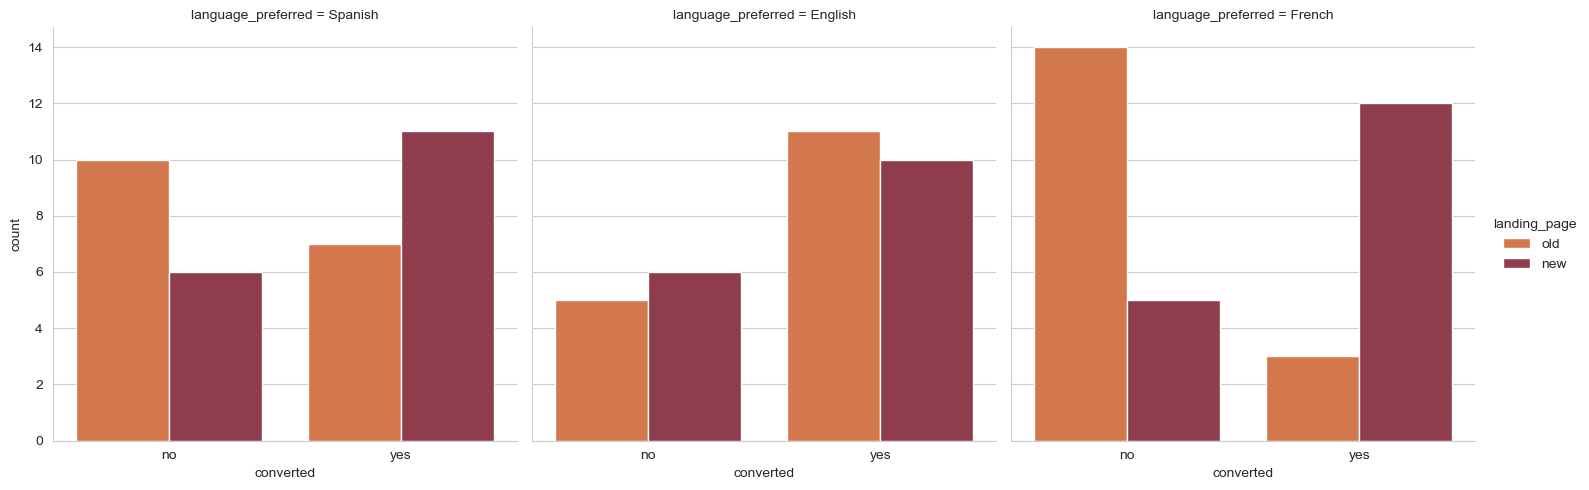

In [21]:
plt.figure(figsize = (5,3));
sns.catplot(hue = 'landing_page', data = df, kind = 'count', col = 'language_preferred', x = 'converted');
plt.show();

#  Testing the hypothesis

# 1. Do the users spend more time on the new landing page than the existing landing page?

Define the null and alternate hypotheses
𝜇1= Time spent on the new landing page
𝜇2= Time spent on the old landing page
Null hypothesis

𝐻0:𝜇1<=𝜇2

Alternative hypothesis

𝐻a:𝜇1>𝜇2

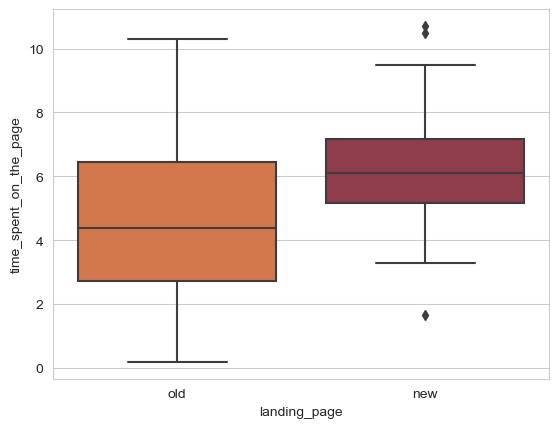

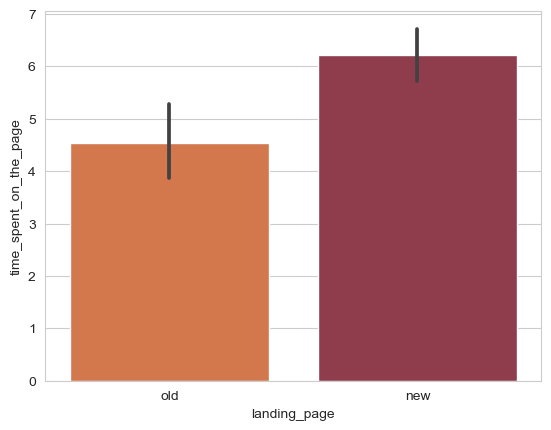

In [22]:
sns.color_palette("icefire_r")
sns.boxplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show()
sns.barplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show()

In [23]:
new_landing= df[df['landing_page'] == 'new'].reset_index()
old_landing=df[df['landing_page'] == 'old'].reset_index()

In [24]:
# find the sample means and sample standard deviations for the two samples
print('The mean spent time on the new landing page is ' + str(new_landing['time_spent_on_the_page'].mean()))
print('The mean spent time on the old landing page is ' + str(old_landing['time_spent_on_the_page'].mean()))
print('The standard deviation of the new landing page is ' + str(round(new_landing['time_spent_on_the_page'].std(), 2)))
print('The standard deviation of the old landing page is ' + str(round(old_landing['time_spent_on_the_page'].std(), 2)))

The mean spent time on the new landing page is 6.2232
The mean spent time on the old landing page is 4.532400000000001
The standard deviation of the new landing page is 1.82
The standard deviation of the old landing page is 2.58


In [27]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(new_landing['time_spent_on_the_page'], old_landing['time_spent_on_the_page'], 
                               equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


In [29]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


Based on the sample and our p-value(0.000139), which is much less than the level of significance we can reject the null hypothesis.
Hence, we have enough evidence to support the claim that the mean time spent on the new landing page is more than the mean time spent on the old landing page.

# 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?


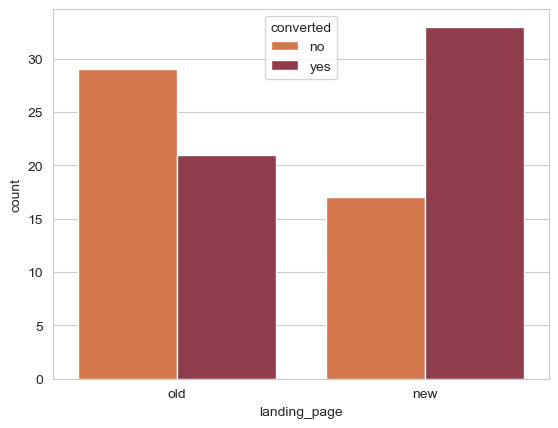

In [30]:
sns.countplot(data=df, x='landing_page',hue='converted');
plt.show()

 Define the null and alternate hypotheses
p1= Proportion of users that visit the new landing,

p2= Proportion of users that visit the old landing

Null hypothesis

H0: p1 = p2
Alternative hypothesis

Ha: p1 > p2

In [31]:
convertion_new=df[(df['landing_page'] == 'new')&(df['converted']=='yes')].reset_index()
convertion_old=df[(df['landing_page'] == 'old')&(df['converted']=='yes')].reset_index()
print('P1:',convertion_new.shape[0])
print('P2:',convertion_old.shape[0])
print('Proportion converted for new landing page:', convertion_new.shape[0]/new_landing.shape[0])
print('Proportion converted for the old landing page:',convertion_old.shape[0]/old_landing.shape[0])

P1: 33
P2: 21
Proportion converted for new landing page: 0.66
Proportion converted for the old landing page: 0.42


In [32]:
from statsmodels.stats.proportion import proportions_ztest
conv_count = np.array([33,21]) # converted users in new and old landing pages
nobs = np.array([50,50])       #  number of observations in new and old landing pages

# this test returns 2 values, test statistic and p-value
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative = 'larger') # Ha as larger
print('p-value : ', p_value)

p-value :  0.008026308204056278


In [33]:
from statsmodels.stats.proportion import proportions_ztest
conv_count = np.array([33,21]) # converted users in new and old landing pages
nobs = np.array([50,50])       #  number of observations in new and old landing pages

# this test returns 2 values, test statistic and p-value
test_stat, p_value = proportions_ztest(conv_count, nobs, alternative = 'larger') # Ha as larger
print('p-value : ', p_value)

p-value :  0.008026308204056278


In [35]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


As the p-value is less(0.008026) than the significance level (0.05), we can reject the null hypothesis.
Thus, we have enough evidence to conclude that the proportion of conversion rate for the new page is greater than the proportion of conversion rate for the old page.

# 3. Is the conversion and preferred language are independent or related?

Define the null and alternate hypotheses
Ho : Converted status is independent of language preferred

Ha : Converted status depends on language preferred

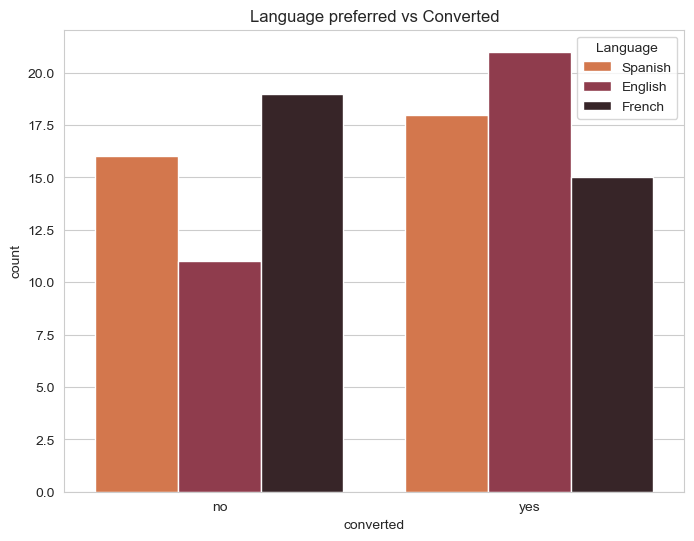

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(hue = 'language_preferred', data = data, x = 'converted')
plt.title('Language preferred vs Converted')
plt.legend(title = 'Language')
plt.show()

In [37]:
lang_conv = pd.crosstab(df['converted'], df['language_preferred'])
lang_conv

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [38]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_conv)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


In [39]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


As the p-value (0.213) is greater than the level of significance (0.05), we fail to reject the null hypothesis.
Hence, we do not have enough statistical evidence to conclude that the conversion status depends on language preference.

# 4. Is the time spent on the new page same for the different language users?

Define the null and alternate hypotheses
Null hypothesis
Ho : All the mean time spent are equal for each language

Alternative hypothesis
Ha : Atleast one of the mean time spent is different from the rest

In [40]:
new=df[(df['landing_page']=='new')]
new
time=new.groupby('language_preferred').agg({'time_spent_on_the_page':['mean']})
print(time)
print(df.groupby('language_preferred').agg({'time_spent_on_the_page':['mean']}))

                   time_spent_on_the_page
                                     mean
language_preferred                       
English                          6.663750
French                           6.196471
Spanish                          5.835294
                   time_spent_on_the_page
                                     mean
language_preferred                       
English                          5.559062
French                           5.253235
Spanish                          5.331765


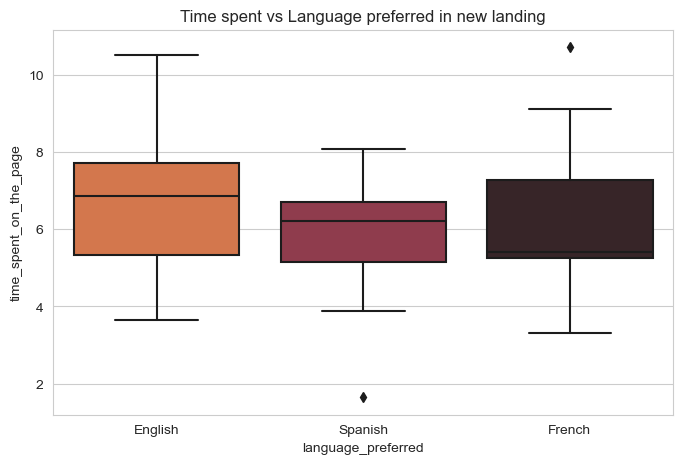

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(data=new_landing, x='language_preferred', y='time_spent_on_the_page')
plt.title('Time spent vs Language preferred in new landing');

In [42]:
# Assumption 1: Normal Distribution
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_landing['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [43]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


# Conclusion and Business Recommendations
